In [16]:
import numpy as np
import pandas as pd
import scipy.stats
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR

In [17]:
def get_data(model_id,data):

    td = np.load('./databygroup.npy',allow_pickle=True).tolist()
    for k in td.keys():
        if '.csv0' in k:
            pass
        else:
            if model_id == 'MLP':
                data['yt'][k]=td[k][:,[-4,-3,-2,-1]]
            else:
                n=td[k].shape[0]
                data['yt'][k]=td[k][:n-20-1,[-4,-3,-2,-1]]

    for f in td.keys():
        if '.csv0' in f:
            pass
        else:
            data['yp'][f]=pd.read_csv('./results/'+model_id+'/results_'+f).values[:,1:]

def get_mse(data):
    datamaxmin=np.load('./databygroup_maxmin.npy',allow_pickle=True).tolist()

    data['mse']={}
    for k in data['yp'].keys():
        if k != '.DS_Store':
            for km in datamaxmin.keys():
                if km in k:
                    datamax,datamin=datamaxmin[km]['max'],datamaxmin[km]['min']
            datay = (data['yp'][k]*0.5+1)*(datamax[[-4,-3,-2,-1]]-datamin[[-4,-3,-2,-1]])+datamin[[-4,-3,-2,-1]]
            datayT = (data['yt'][k]*0.5+1)*(datamax[[-4,-3,-2,-1]]-datamin[[-4,-3,-2,-1]])+datamin[[-4,-3,-2,-1]]
            data['mse'][k]=np.sqrt(np.mean(np.square(datay-datayT)))


In [18]:
model_id='MLP'
dataMLP={'yp':{},
         'yt':{},
         'mse':{}}
get_data(model_id,dataMLP)
get_mse(dataMLP)

model_id='LSTM'
dataLSTM={'yp':{},
         'yt':{},
         'mse':{}}
get_data(model_id,dataLSTM)
get_mse(dataLSTM)

model_id='BLSTM_ATT'
dataATT={'yp':{},
         'yt':{},
         'mse':{}}
get_data(model_id,dataATT)
get_mse(dataATT)

# t检验

In [19]:
sample1 = pd.DataFrame(dataMLP['mse'],index=[1]).values[0]
sample2 = pd.DataFrame(dataLSTM['mse'],index=[1]).values[0]
sample3 = pd.DataFrame(dataATT['mse'],index=[1]).values[0]
r1 = scipy.stats.ttest_ind(sample1, sample2)
r2 = scipy.stats.ttest_ind(sample1, sample3)
r3 = scipy.stats.ttest_ind(sample2, sample3)

In [20]:
sample1.mean(),sample2.mean(),sample3.mean()

(0.7706977913041659, 0.4931513299506935, 0.4420120521367121)

In [21]:
results = [
    [r1.__getattribute__("statistic"), r2.__getattribute__("pvalue")],
    [r2.__getattribute__("statistic"), r2.__getattribute__("pvalue")],
    [r3.__getattribute__("statistic"), r2.__getattribute__("pvalue")]
]
pd.DataFrame(results).to_csv('./Table3.csv')

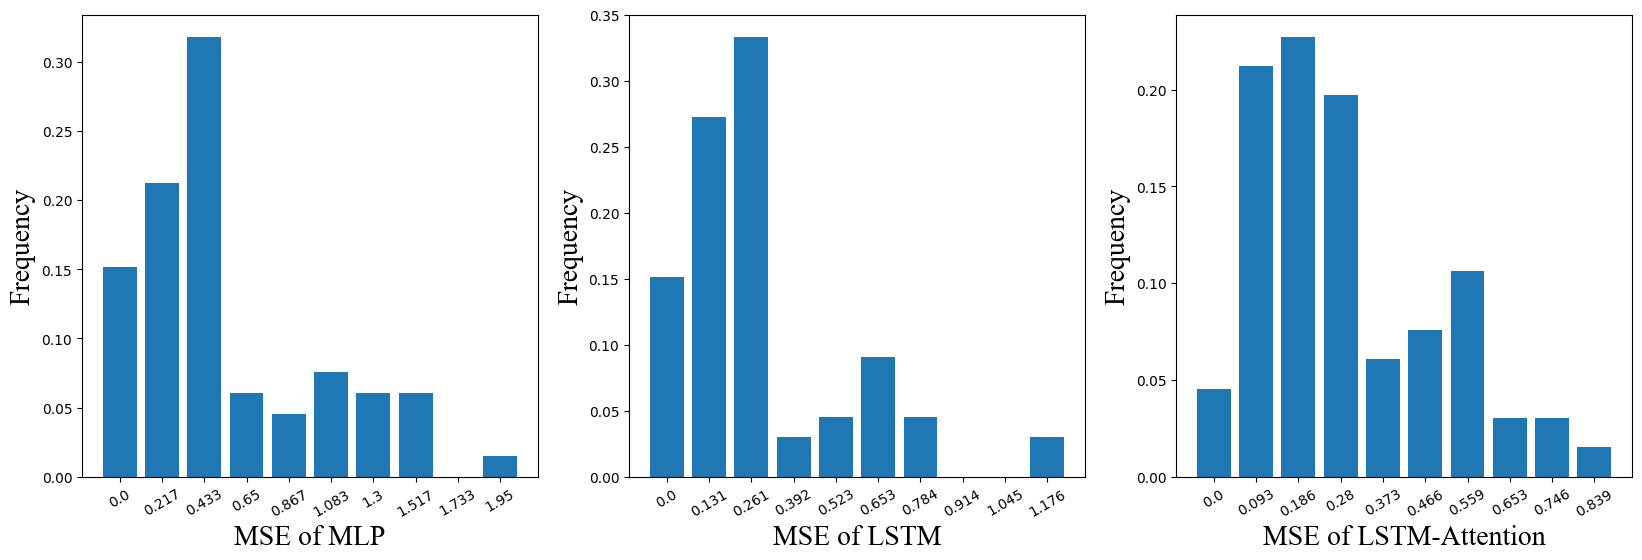

In [22]:
font1={'family':'Times New Roman','weight':'normal','size':20}

fig,ax = plt.subplots(1,3,figsize=(20,6))
size=10

mse=[]
for k in dataMLP['mse'].keys():
    mse.append(dataMLP['mse'][k])
p = scipy.stats.relfreq(mse, numbins=size).frequency
ax[0].bar([i for i in range(p.shape[0])],p)
t=np.arange(0,np.max(mse),(np.max(mse)-0)/size)
ax[0].set_xticks([i for i in range(t.shape[0])],[str(np.round(i,3)) for i in t],rotation = 30)
ax[0].set_ylabel('Frequency',font=font1)
ax[0].set_xlabel('MSE of MLP',font=font1)

mse=[]
for k in dataLSTM['mse'].keys():
    mse.append(dataLSTM['mse'][k])
p = scipy.stats.relfreq(mse, numbins=size).frequency
ax[1].bar([i for i in range(p.shape[0])],p)
t=np.arange(0,np.max(mse),(np.max(mse)-0)/size)
ax[1].set_xticks([i for i in range(t.shape[0])],[str(np.round(i,3)) for i in t],rotation = 30)
ax[1].set_ylabel('Frequency',font=font1)
ax[1].set_xlabel('MSE of LSTM',font=font1)

mse=[]
for k in dataATT['mse'].keys():
    mse.append(dataATT['mse'][k])
p = scipy.stats.relfreq(mse, numbins=size).frequency
ax[2].bar([i for i in range(p.shape[0])],p)
t=np.arange(0,np.max(mse),(np.max(mse)-0)/size)
ax[2].set_xticks([i for i in range(t.shape[0])],[str(np.round(i,3)) for i in t],rotation = 30)
ax[2].set_ylabel('Frequency',font=font1)
ax[2].set_xlabel('MSE of LSTM-Attention',font=font1)

plt.savefig('./fig7-aug.tif',dpi=100)

/Users/tianwenchong/Desktop/Text12-Koopman-WQ-code
/Users/tianwenchong/Desktop/Text12-Koopman-WQ-code
/Users/tianwenchong/Desktop/Text12-Koopman-WQ-code


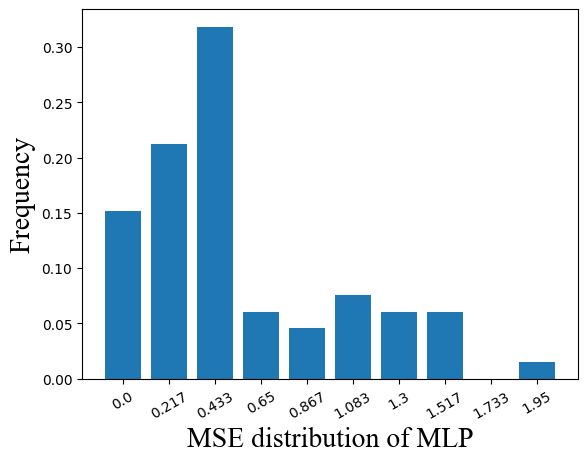

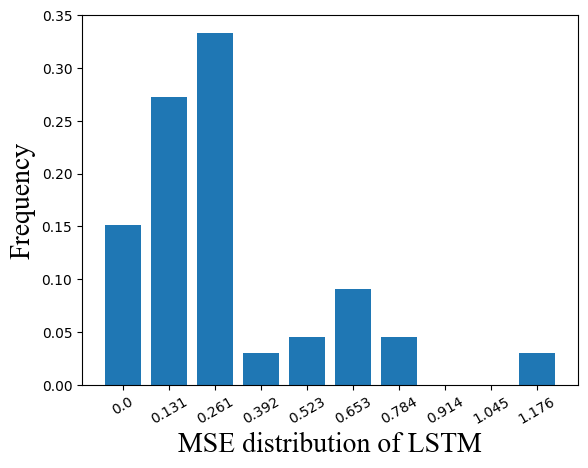

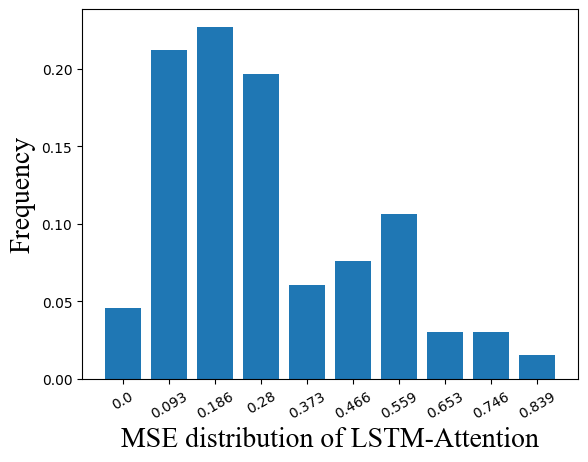

In [24]:
font1={'family':'Times New Roman','weight':'normal','size':20}

size=10

for kk in range(3):
    if kk == 0:
        plt.figure()
        mse=[]
        for k in dataMLP['mse'].keys():
            mse.append(dataMLP['mse'][k])
        p = scipy.stats.relfreq(mse, numbins=size).frequency
        plt.bar([i for i in range(p.shape[0])],p)
        t=np.arange(0,np.max(mse),(np.max(mse)-0)/size)
        plt.xticks([i for i in range(t.shape[0])],[str(np.round(i,3)) for i in t],rotation = 30)
        plt.ylabel('Frequency',font=font1)
        plt.xlabel('MSE distribution of MLP',font=font1)
        
        os.chdir(os.path.pardir)
        print(os.getcwd())
        plt.savefig('./fig7-d-aug.tif',bbox_inches = 'tight',dpi=200)
        os.chdir('./Step5-2_DNN-dataaug')
    elif kk == 1:
        plt.figure()
        mse=[]
        for k in dataLSTM['mse'].keys():
            mse.append(dataLSTM['mse'][k])
        p = scipy.stats.relfreq(mse, numbins=size).frequency
        plt.bar([i for i in range(p.shape[0])],p)
        t=np.arange(0,np.max(mse),(np.max(mse)-0)/size)
        plt.xticks([i for i in range(t.shape[0])],[str(np.round(i,3)) for i in t],rotation = 30)
        plt.ylabel('Frequency',font=font1)
        plt.xlabel('MSE distribution of LSTM',font=font1)
        
        os.chdir(os.path.pardir)
        print(os.getcwd())
        plt.savefig('./fig7-e-aug.tif',bbox_inches = 'tight',dpi=200)
        os.chdir('./Step5-2_DNN-dataaug')
    else:
        plt.figure()
        mse=[]
        for k in dataATT['mse'].keys():
            mse.append(dataATT['mse'][k])
        p = scipy.stats.relfreq(mse, numbins=size).frequency
        plt.bar([i for i in range(p.shape[0])],p)
        t=np.arange(0,np.max(mse),(np.max(mse)-0)/size)
        plt.xticks([i for i in range(t.shape[0])],[str(np.round(i,3)) for i in t],rotation = 30)
        plt.ylabel('Frequency',font=font1)
        plt.xlabel('MSE distribution of LSTM-Attention',font=font1)

        os.chdir(os.path.pardir)
        print(os.getcwd())
        plt.savefig('./fig7-f-aug.tif',bbox_inches = 'tight',dpi=200)
        os.chdir('./Step5-2_DNN-dataaug')